# 1. Introduction 👋

<center><img src="https://images.unsplash.com/photo-1553729459-efe14ef6055d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2070&q=80" alt="Loan Picture" width="600" height="600"></center><br>

## Data Set Problems 🤔

👉 The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict loan approval

👨‍💻 **The machine learning models used in this project are:**
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

---

## Data Set Description 🧾
👉 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*

# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
# Data
!pip install folktables
# ShaRP
!pip install git+https://github.com/DataResponsibly/ShaRP.git

  Cloning https://github.com/DataResponsibly/ShaRP.git to /tmp/pip-req-build-81zpie_j
  Running command git clone --filter=blob:none --quiet https://github.com/DataResponsibly/ShaRP.git /tmp/pip-req-build-81zpie_j
  Resolved https://github.com/DataResponsibly/ShaRP.git to commit b1583d7ce75fb1dde2f0ab46da6e3edd0b13d21d
  Preparing metadata (setup.py) ... done
  Created wheel for sharp: filename=sharp-0.1.dev0-py3-none-any.whl size=28965 sha256=51431582185491a6be9fc66eedb7d98aa89cb2c70de38d5d4f99ac3994aff018
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ebl51cp/wheels/a8/77/22/f347a84278c6d9294aefeffe944354bbe6aa605222284e8019
Successfully built sharp


In [ ]:
from sharp import ShaRP
from sharp.qoi import TopKQoI,FlipQoI,DiffQoI
from sharp.utils import scores_to_ordering

import shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [ ]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


👉 As can be seen, the **13 columns** are readable. It also can be seen that there are **614 observations** in the data set.

# 4. Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

## 4.1 Categorical Variable 📊
👉 The first type of variable that I will explore is categorical variable.

### 4.1.1 Loan ID

In [ ]:
# df.Loan_ID.value_counts(dropna=False)

👉 It can be seen that there are 614 unique ID in the dataset.

### 4.1.2 Gender

In [ ]:
# df.Gender.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Gender", data=df, palette="hls")
# plt.show()

In [ ]:
# countMale = len(df[df.Gender == 'Male'])
# countFemale = len(df[df.Gender == 'Female'])
# countNull = len(df[df.Gender.isnull()])

# print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
# print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

### 4.1.3 Married

In [ ]:
# df.Married.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Married", data=df, palette="Paired")
# plt.show()

👉 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

In [ ]:
# countMarried = len(df[df.Married == 'Yes'])
# countNotMarried = len(df[df.Married == 'No'])
# countNull = len(df[df.Married.isnull()])

# print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
# print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

### 4.1.4 Education

In [ ]:
# df.Education.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Education", data=df, palette="rocket")
# plt.show()

In [ ]:

# countGraduate = len(df[df.Education == 'Graduate'])
# countNotGraduate = len(df[df.Education == 'Not Graduate'])
# countNull = len(df[df.Education.isnull()])

# print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
# print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### 4.1.5 Self Employed

In [ ]:
# df.Self_Employed.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Self_Employed", data=df, palette="crest")
# plt.show()

In [ ]:
# countNo = len(df[df.Self_Employed == 'No'])
# countYes = len(df[df.Self_Employed == 'Yes'])
# countNull = len(df[df.Self_Employed.isnull()])

# print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
# print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

👉 The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### 4.1.6 Credit History

In [ ]:
# df.Credit_History.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Credit_History", data=df, palette="viridis")
# plt.show()

In [ ]:
# count1 = len(df[df.Credit_History == 1])
# count0 = len(df[df.Credit_History == 0])
# countNull = len(df[df.Credit_History.isnull()])

# print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
# print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### 4.1.7 Property Area

In [ ]:
# df.Property_Area.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Property_Area", data=df, palette="cubehelix")
# plt.show()

In [ ]:
# countUrban = len(df[df.Property_Area == 'Urban'])
# countRural = len(df[df.Property_Area == 'Rural'])
# countSemiurban = len(df[df.Property_Area == 'Semiurban'])
# countNull = len(df[df.Property_Area.isnull()])

# print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
# print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
# print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

👉 This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### 4.1.8 Loan Status

In [ ]:
# df.Loan_Status.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
# plt.show()

In [ ]:
# countY = len(df[df.Loan_Status == 'Y'])
# countN = len(df[df.Loan_Status == 'N'])
# countNull = len(df[df.Loan_Status.isnull()])

# print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
# print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

👉 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### 4.1.9 Loan Amount Term

In [ ]:
# df.Loan_Amount_Term.value_counts(dropna=False)

In [ ]:
# sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
# plt.show()

In [ ]:
# count12 = len(df[df.Loan_Amount_Term == 12.0])
# count36 = len(df[df.Loan_Amount_Term == 36.0])
# count60 = len(df[df.Loan_Amount_Term == 60.0])
# count84 = len(df[df.Loan_Amount_Term == 84.0])
# count120 = len(df[df.Loan_Amount_Term == 120.0])
# count180 = len(df[df.Loan_Amount_Term == 180.0])
# count240 = len(df[df.Loan_Amount_Term == 240.0])
# count300 = len(df[df.Loan_Amount_Term == 300.0])
# count360 = len(df[df.Loan_Amount_Term == 360.0])
# count480 = len(df[df.Loan_Amount_Term == 480.0])
# countNull = len(df[df.Loan_Amount_Term.isnull()])

# print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
# print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

👉 As can be seen from the results, **the 360 days loan duration is the most popular** compared to others.

## 4.2 Numerical Variable 🔢
👉 The second variable that I will explore is categorical variable.

### 4.2.1 Describe Numerical Variable 🔎
👉 This section will show mean, count, std, min, max and others using describe function.


In [ ]:
# df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

### 4.2.2 Distribution of Numerical Variable 📈
👉 In this section, I will show the distribution of numerical variable using histogram and violin plot.

#### 4.2.2.1 Histogram Distribution 📉

In [ ]:
# sns.set(style="darkgrid")
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
# sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
# sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#### 4.2.2.2 Violin Plot 🎻

In [ ]:
# sns.set(style="darkgrid")
# fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

# sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
# sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
# sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

*   The distribution of **Applicant income, Co Applicant Income, and Loan Amount** are **positively skewed** and **it has outliers** (can be seen from both histogram and violin plot).
*   The distribution of **Loan Amount Term** is **negativly skewed** and **it has outliers.**



## 4.3 Other Exploration 💹
👉 This section will show additional exploration from each variables. The additional exploration are:
*   Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
*   Heatmap



### 4.3.1 Heatmap 🔥

In [ ]:
# df

In [ ]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df.corr(), annot=True, cmap='inferno');

👉 There is positive correlation between Loan Amount and Applicant Income

### 4.3.2 Categorical 📊 - Categorical 📊

In [ ]:
# pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
# plt.title('Gender vs Married')
# plt.xlabel('Gender')
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.show()

👉 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

In [ ]:
# pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
# plt.title('Self Employed vs Credit History')
# plt.xlabel('Self Employed')
# plt.ylabel('Frequency')
# plt.legend(["Bad Credit", "Good Credit"])
# plt.xticks(rotation=0)
# plt.show()

👉 Most not self employed applicants have good credit compared to self employed applicants.

In [ ]:
# pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
# plt.title('Property Area vs Loan Status')
# plt.xlabel('Property Area')
# plt.ylabel('Frequency')
# plt.xticks(rotation=0)
# plt.show()

👉 Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### 4.3.3 Categorical 📊- Numerical 📈

In [ ]:
# sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

In [ ]:
# sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

👉 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

In [ ]:
# sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

👉 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

### 4.3.4 Numerical 📈 - Numerical 📈

In [ ]:
# df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
# plt.title('Applicant Income - Co Applicant Income')
# plt.xlabel('ApplicantIncome')
# plt.ylabel('CoapplicantIncome')
# plt.show()
# print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
# print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

*   There is **negative correlation** between Applicant income and Co Applicant Income.
*   The correlation coefficient is **significant** at the 95 per cent confidence interval, as it has a **p-value of 1.46**


## 4.4 Null Values 🚫

In [ ]:
# df.isnull().sum()

In [ ]:
# plt.figure(figsize = (24, 5))
# axz = plt.subplot(1,2,2)
# mso.bar(df, ax = axz, fontsize = 12);

👉 Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored **for all variables** in the dataset.

# 5. Data Preprocessing ⚙

## 5.1 Drop Unecessary Variables 🔻
👉 Unecessary variables will be dropped in this section.

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)

## 5.2 Data Imputation 📝
👉 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

### 5.2.1 Categorical Variables 📊
👉 In this section, the imputation for categorical variables will be performed using **mode**.

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

### 5.2.2 Numerical Variables 📈
👉 The next section is imputation for numerical variables using **mean**.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

## 5.3 One-hot Encoding 🔧
👉 In this section, I will **transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.**

In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

## 5.3 Remove Outliers & Infinite values 🚮
👉 Since there are outliers, **the outliers will be removed**. <br>


In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate quartiles and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

## 5.4 Skewed Distribution Treatment 📐
👉 In previous section, it already shown that **distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**. <br>
👉 I will use **square root transformation** to normalized the distribution.

In [ ]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

In [ ]:
# sns.set(style="darkgrid")
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
# sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
# sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

👉 As can be seen, the distribution after using log transformation are much better compared to original distribution.

## 5.5 Features Separating ➗
👉 Dependent features (Loan_Status) will be seperated from independent features.

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## 5.6 SMOTE Technique 🔨
👉 In previous exploration, it can be seen that **the number between approved and rejected loan is imbalanced**. In this section, **oversampling technique will be used to avoid overfitting**,

In [ ]:
X_aug, y_aug = SMOTE().fit_resample(X, y)

<ipython-input-97-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


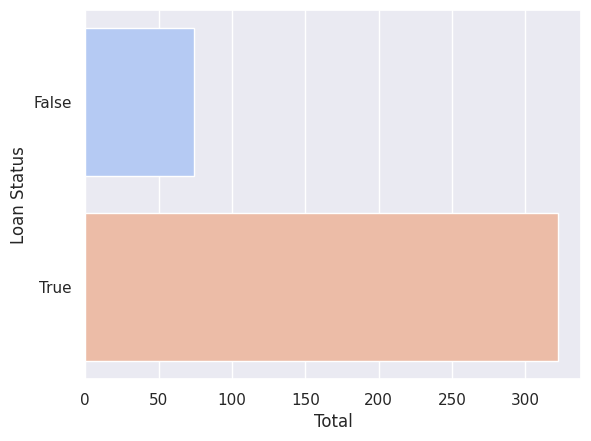

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

<ipython-input-98-2eb0d7e1aad2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_aug, data=df, palette="coolwarm")


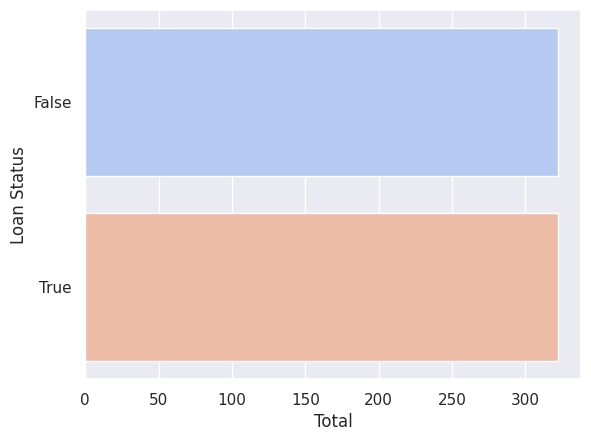

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_aug, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

👉 As can be seen, the distrubtion of Loan status are now **balanced**.

## 5.7 Data Normalization ⚖
👉 In this section, data normalization will be performed **to normalize the range of independent variables or features of data**.

In [ ]:
X_aug = MinMaxScaler().fit_transform(X_aug)

## 5.8 Splitting Data Set 🪓
👉 The data set will be split into **80% train and 20% test**.

In [ ]:
X_traint, X_testt, y_traint, y_testt = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size = 0.2, random_state = 0)

# 6. Models 🛠

## 6.1 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.92      0.73      0.82        67
        True       0.76      0.94      0.84        62

    accuracy                           0.83       129
   macro avg       0.84      0.83      0.83       129
weighted avg       0.85      0.83      0.83       129

[[49 18]
 [ 4 58]]
LR accuracy: 82.95%


## 6.2 K-Nearest Neighbour (KNN)

In [ ]:
# scoreListknn = []
# for i in range(1,21):
#     KNclassifier = KNeighborsClassifier(n_neighbors = i)
#     KNclassifier.fit(X_train, y_train)
#     scoreListknn.append(KNclassifier.score(X_test, y_test))

# plt.plot(range(1,21), scoreListknn)
# plt.xticks(np.arange(1,21,1))
# plt.xlabel("K value")
# plt.ylabel("Score")
# plt.show()
# KNAcc = max(scoreListknn)
# print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 6.3 Support Vector Machine (SVM)

In [ ]:
# SVCclassifier = SVC(kernel='rbf', max_iter=500)
# SVCclassifier.fit(X_train, y_train)

# y_pred = SVCclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# SVCAcc = accuracy_score(y_pred,y_test)
# print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

## 6.4 Naive Bayes

### 6.4.1 Categorical NB

In [ ]:
# NBclassifier1 = CategoricalNB()
# NBclassifier1.fit(X_train, y_train)

# y_pred = NBclassifier1.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# NBAcc1 = accuracy_score(y_pred,y_test)
# print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

### 6.4.2 Gaussian NB

In [ ]:
# NBclassifier2 = GaussianNB()
# NBclassifier2.fit(X_train, y_train)

# y_pred = NBclassifier2.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# NBAcc2 = accuracy_score(y_pred,y_test)
# print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

## 6.5 Decision Tree

In [ ]:
# scoreListDT = []
# for i in range(2,21):
#     DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
#     DTclassifier.fit(X_train, y_train)
#     scoreListDT.append(DTclassifier.score(X_test, y_test))

# plt.plot(range(2,21), scoreListDT)
# plt.xticks(np.arange(2,21,1))
# plt.xlabel("Leaf")
# plt.ylabel("Score")
# plt.show()
# DTAcc = max(scoreListDT)
# print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 6.6 Random Forest

In [ ]:
scoreListRF = []
for i in range(20,21):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

# plt.plot(range(2,25), scoreListRF)
# plt.xticks(np.arange(2,25,1))
# plt.xlabel("RF Value")
# plt.ylabel("Score")
# plt.show()
# RFAcc = max(scoreListRF)
# print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 6.7 Gradient Boosting

In [ ]:
# paramsGB={'n_estimators':[100,200,300,400,500],
#       'max_depth':[1,2,3,4,5],
#       'subsample':[0.5,1],
#       'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
# GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
# GB.fit(X_train, y_train)

In [ ]:
# print(GB.best_estimator_)
# print(GB.best_score_)
# print(GB.best_params_)
# print(GB.best_index_)

In [ ]:
# GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
# GBclassifier.fit(X_train, y_train)

# y_pred = GBclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# GBAcc = accuracy_score(y_pred,y_test)
# print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

# 7. Model Comparison 👀

In [ ]:
# compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
#                                   'SVM', 'Categorical NB',
#                                   'Gaussian NB', 'Decision Tree',
#                                   'Random Forest', 'Gradient Boost'],
#                         'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
#                                      NBAcc1*100, NBAcc2*100, DTAcc*100,
#                                      RFAcc*100, GBAcc*100]})
# compare.sort_values(by='Accuracy', ascending=False)

👉 In general, it can be seen that **all models can achieve up to 70% accuracy**. <br>
👉 The highest accuracy is **93%%**. <br><br>
👉 If you have any suggestions to **improve** these models, we can *discuss in the comments* :).

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*<br><br>
#### 🎈 Check out my work on GitHub using similar data sets with SAS studio [here](https://github.com/caesarmario/loan-prediction-SAS-studio).

#SHAP

In [ ]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,53.851648,0.000000,8.426150,360.0,1.0,False,False,True,False,False,False,True,False,True,False,False,True
610,64.078077,0.000000,6.324555,180.0,1.0,True,True,False,False,False,True,True,False,True,False,False,True
611,89.844310,15.491933,15.905974,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True
612,87.080423,0.000000,13.674794,360.0,1.0,True,True,False,False,True,False,True,False,False,False,True,True


In [ ]:
# # graphviz is installed already, but need lib too
# !apt install libgraphviz-dev
# !pip install pygraphviz
# !SETUPTOOLS_USE_DISTUTILS=stdlib pip install git+https://github.com/stefan-grafberger/mlinspect.git@c2207ef058e5fb28cc74c72c7c9f3deed04fc639
# !pip install tensorflow==2.15.0
# !pip install keras==2.15.0
# !pip install jinja2==3.0.3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
# !pip install aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fairlearn to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import urllib
from inspect import cleandoc

import os
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector
from mlinspect.checks import NoBiasIntroducedFor, NoIllegalFeatures
from mlinspect.inspections import MaterializeFirstOutputRows

In [ ]:
from folktables import ACSDataSource, ACSEmployment, ACSIncome, ACSPublicCoverage, ACSMobility, ACSTravelTime
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import clear_output

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [ ]:
# from mlinspect.inspections import FairnessEvaluation
import shap

In [ ]:
model = RFclassifier
X_s = X_test

In [ ]:
# Calculate predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Find index with highest and lowest predicted probability
itop = np.argmax(y_pred_proba)
ibottom = np.argmin(y_pred_proba)

# Use X_test (X_s) for SHAP values
X_s = X_test

# SHAP explanation
# Summarize the background data using a smaller subset
# background = shap.sample(X_s, 50)
background = shap.kmeans(X_s, 50)  # Use 50 samples for background summary
explainer = shap.KernelExplainer(model.predict, background)
shap_values = explainer.shap_values(X_s)

  0%|          | 0/129 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
sharp_explainer = ShaRP(
    qoi="diff",
    target_function=clf.predict,
    measure="shapley",
    sample_size=None,
    replace=False,
    random_state=42,
)
sharp_explainer.fit(X_s)

In [ ]:
X_test[0]

#AQ

In [ ]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,63.142696,37.563280,12.529964,360.0,1.0,True,True,False,False,True,False,False,False,True,False,False,True
608,56.850682,44.158804,10.392305,360.0,1.0,True,True,True,False,False,False,True,False,True,False,False,True
609,53.851648,0.000000,8.426150,360.0,1.0,False,False,True,False,False,False,True,False,True,False,False,True
611,89.844310,15.491933,15.905974,360.0,1.0,True,True,False,True,False,False,True,False,False,False,True,True


In [ ]:
X_test.shape

(129, 16)

In [ ]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education', 'Self_Employed', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [ ]:
y_test.isna().sum()

0

In [ ]:
y_pred = model.predict(X_test)

# Convert ndarray back to DataFrame
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])
X_test_df['Gender_Married'] = X_test_df['Gender'].map({1: 'male', 0: 'female'}) + '_' + X_test_df['Married'].map({1: 'married', 0: 'unmarried'})
# Build the of information to pass to Aequitas
pred_data = X_test_df.filter(items=["Gender","Married", "Gender_Married"])
pred_data['score'] = y_pred
# Reset index of pred_data
pred_data.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
pred_data['label_value'] = y_test



# Score and label_value are boolean by default, and we need them to be int
pred_data['score'] = pred_data['score'].astype('int')
pred_data['label_value'] = pred_data['label_value'].astype('int')
pred_data

,Gender,Married,Gender_Married,score,label_value
0,1.0,1.0,male_married,0,0
1,1.0,1.0,male_married,0,1
2,0.0,1.0,female_married,0,0
3,1.0,1.0,male_married,0,1
4,1.0,1.0,male_married,0,0
...,...,...,...,...,...
124,1.0,1.0,male_married,0,0
125,1.0,1.0,male_married,1,1
126,1.0,0.0,male_unmarried,1,0
127,1.0,1.0,male_married,0,0


In [ ]:
#@markdown Set the color palette; very optional
aq_palette = sns.diverging_palette(225, 35, n=2)

Text(0.5, 1.0, 'Bar Plot of Actual Eligibility by Gender')

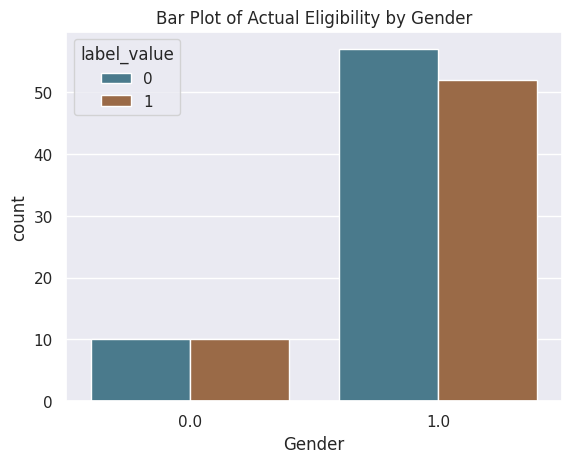

In [ ]:
label_by_gender = sns.countplot(x="Gender", hue="label_value", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Eligibility by Gender")

Text(0.5, 1.0, 'Bar Plot of Predicted Eligibility by Gender')

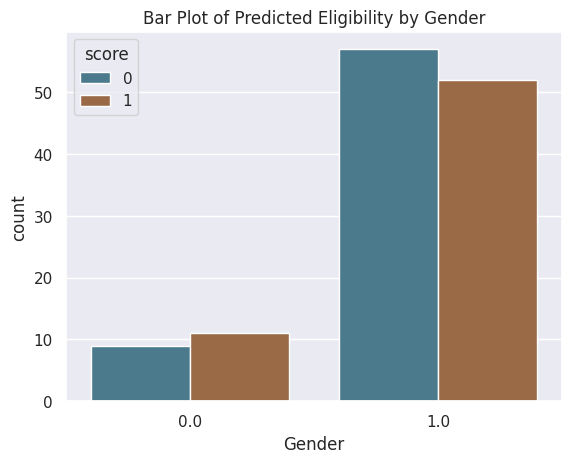

In [ ]:
score_gender = sns.countplot(x="Gender", hue="score", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Predicted Eligibility by Gender")

Text(0.5, 1.0, 'Bar Plot of Actual Eligibility by Marraige Status')

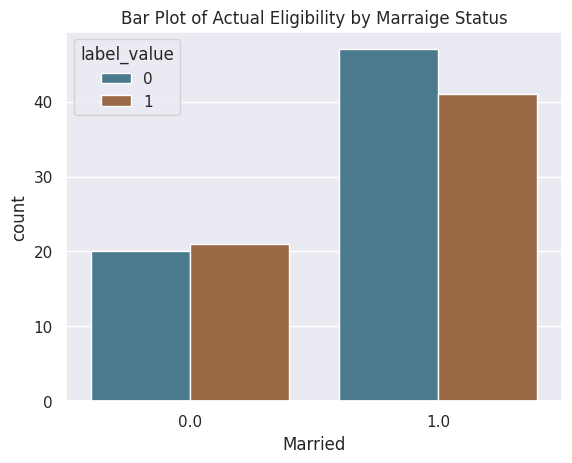

In [ ]:
label_by_married = sns.countplot(x="Married", hue="label_value", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Eligibility by Marraige Status")

Text(0.5, 1.0, 'Bar Plot of Actual Eligibility by Marraige Status')

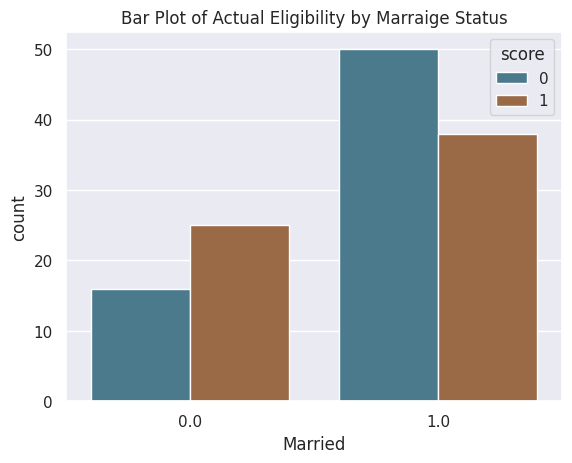

In [ ]:
score_married = sns.countplot(x="Married", hue="score", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Eligibility by Marraige Status")

([0, 1, 2, 3],
 [Text(0, 0, 'male_married'),
  Text(1, 0, 'female_married'),
  Text(2, 0, 'male_unmarried'),
  Text(3, 0, 'female_unmarried')])

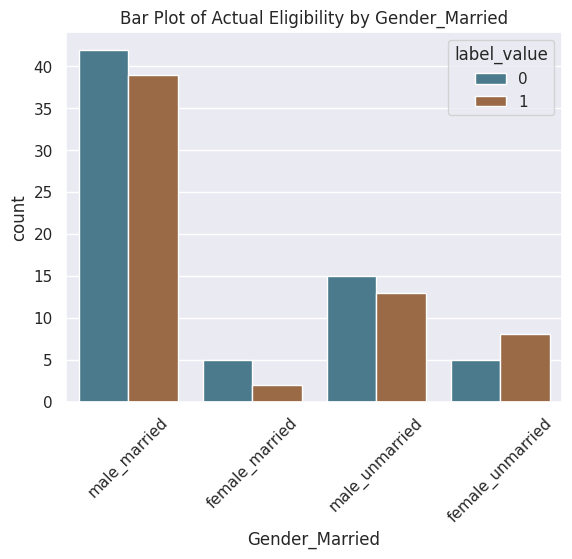

In [ ]:
label_by_gender_married = sns.countplot(x="Gender_Married", hue="label_value", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Eligibility by Gender_Married")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'male_married'),
  Text(1, 0, 'female_married'),
  Text(2, 0, 'male_unmarried'),
  Text(3, 0, 'female_unmarried')])

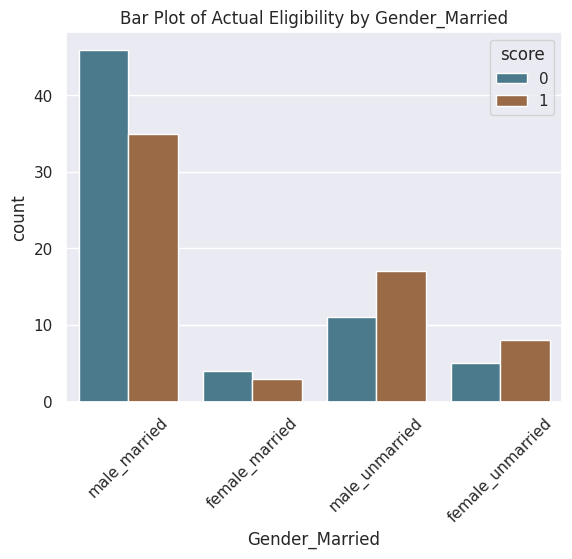

In [ ]:
score_gender_married = sns.countplot(x="Gender_Married", hue="score", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Eligibility by Gender_Married")
plt.xticks(rotation=45)

In [ ]:
pred_data['Gender'] = pred_data['Gender'].astype('bool')
pred_data['Married'] = pred_data['Married'].astype('bool')
pred_data['Gender'] = pred_data['Gender'].map({True: 'male', False: 'female'})
pred_data['Married'] = pred_data['Married'].map({True: 'married', False: 'unmarried'})


In [ ]:
pred_data

,Gender,Married,Gender_Married,score,label_value
0,male,married,male_married,0,0
1,male,married,male_married,0,1
2,female,married,female_married,0,0
3,male,married,male_married,0,1
4,male,married,male_married,0,0
...,...,...,...,...,...
124,male,married,male_married,0,0
125,male,married,male_married,1,1
126,male,unmarried,male_unmarried,1,0
127,male,married,male_married,0,0


In [ ]:
g = Group()
xtab, _ = g.get_crosstabs(pred_data)

In [ ]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,63,Gender,female,11,9,3,2,7,8,10,10,20,129
1,0,binary 0/1,63,Gender,male,52,57,10,10,47,42,52,57,109,129
2,0,binary 0/1,63,Married,married,38,50,5,8,42,33,41,47,88,129
3,0,binary 0/1,63,Married,unmarried,25,16,8,4,12,17,21,20,41,129
4,0,binary 0/1,63,Gender_Married,female_married,3,4,1,0,4,2,2,5,7,129
5,0,binary 0/1,63,Gender_Married,female_unmarried,8,5,2,2,3,6,8,5,13,129
6,0,binary 0/1,63,Gender_Married,male_married,35,46,4,8,38,31,39,42,81,129
7,0,binary 0/1,63,Gender_Married,male_unmarried,17,11,6,2,9,11,13,15,28,129


Aequitas uses some names and acronyms unlike what we have used in class:

precision is PPV
ppr  =PP𝐺𝑃  where  𝑃  is the total number of people predicted positive across all groups, and  PP𝐺  is the number of people in group  𝐺  predicted positive.
pprev is the Selection Rate
prev is the Prevalence

In [ ]:
#@markdown View calculated "absolute metrics" (like false positive rates) for each group
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Gender,female,0.75,0.80,0.70,0.22,0.27,0.30,0.20,0.78,0.73,0.17,0.55,0.50
1,Gender,male,0.82,0.81,0.82,0.18,0.19,0.18,0.19,0.82,0.81,0.83,0.48,0.48
2,Married,married,0.85,0.80,0.89,0.16,0.13,0.11,0.20,0.84,0.87,0.60,0.43,0.47
3,Married,unmarried,0.71,0.81,0.60,0.25,0.32,0.40,0.19,0.75,0.68,0.40,0.61,0.51
4,Gender_Married,female_married,0.86,1.00,0.80,0.00,0.33,0.20,0.00,1.00,0.67,0.05,0.43,0.29
5,Gender_Married,female_unmarried,0.69,0.75,0.60,0.40,0.25,0.40,0.25,0.60,0.75,0.13,0.62,0.62
6,Gender_Married,male_married,0.85,0.79,0.90,0.17,0.11,0.10,0.21,0.83,0.89,0.56,0.43,0.48
7,Gender_Married,male_unmarried,0.71,0.85,0.60,0.18,0.35,0.40,0.15,0.82,0.65,0.27,0.61,0.46


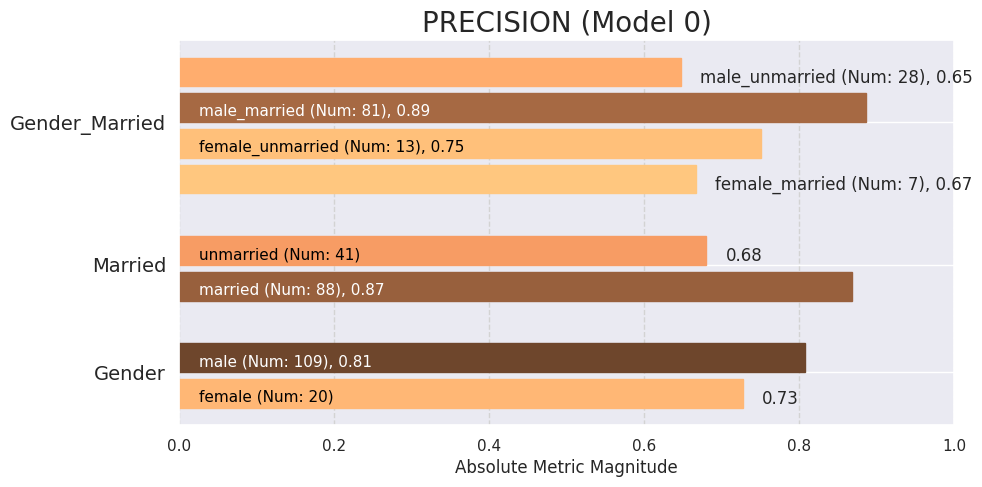

In [ ]:
fnr = aqp.plot_group_metric(xtab, 'precision')

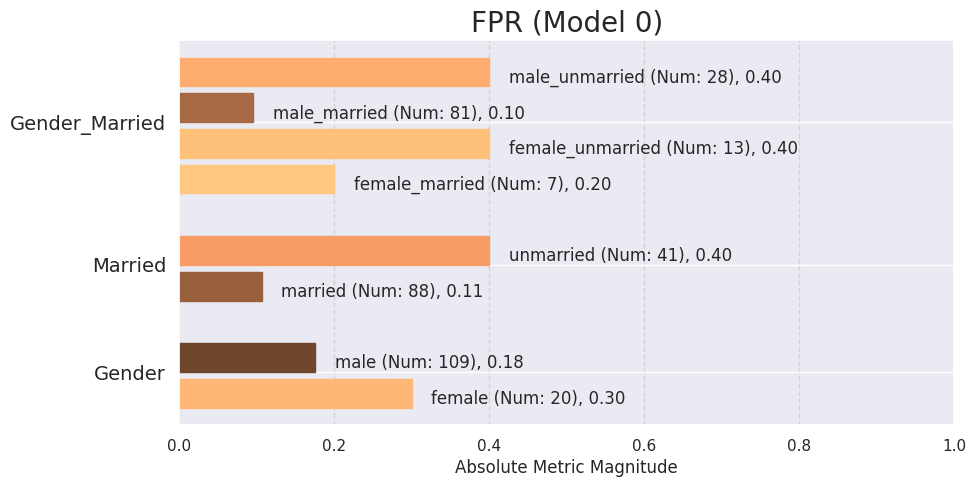

In [ ]:
aqp = Plot()
fnr = aqp.plot_group_metric(xtab, 'fpr')

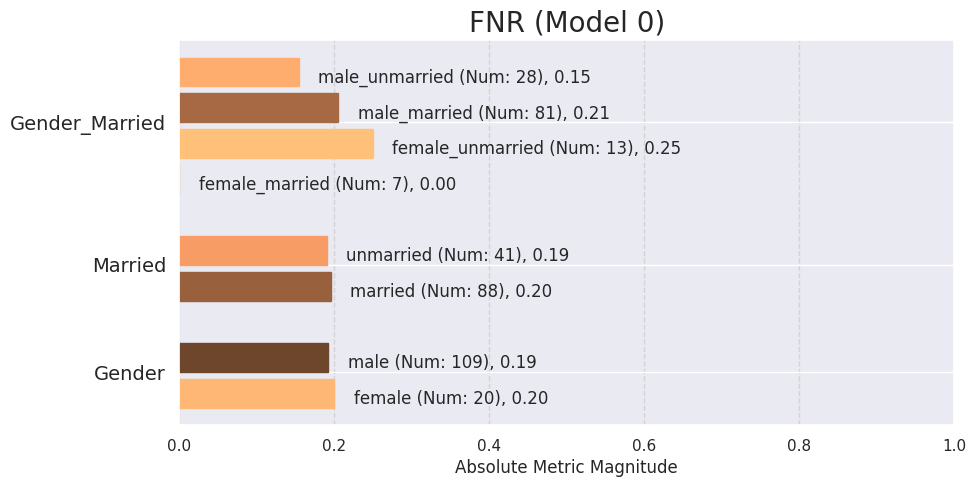

In [ ]:
fnr = aqp.plot_group_metric(xtab, 'fnr')

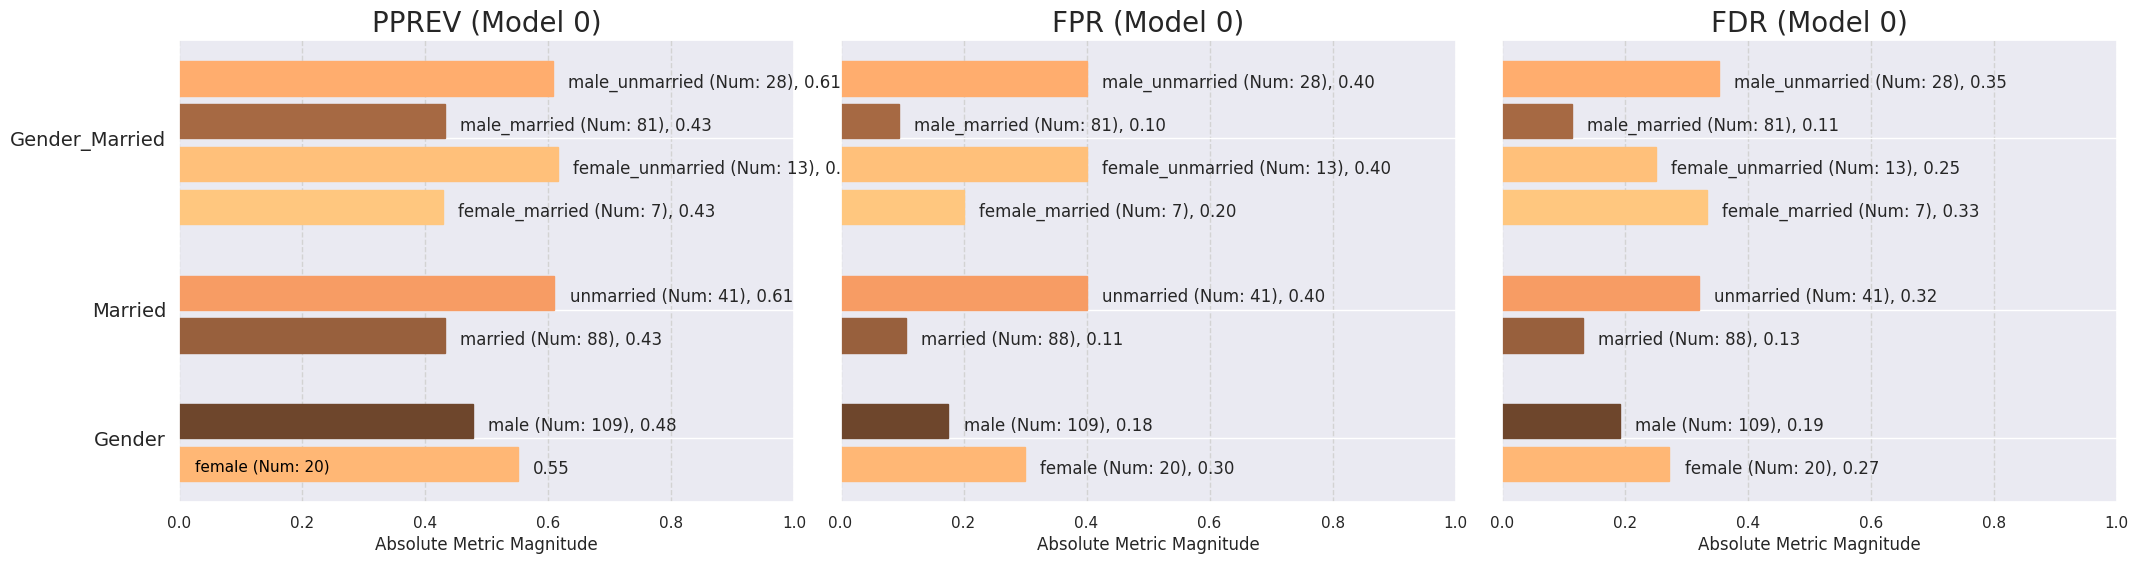

<Figure size 640x480 with 0 Axes>

In [ ]:
p = aqp.plot_group_metric_all(xtab, metrics=['pprev','fpr','fdr'], ncols=3)